## Linearization of Differential Equations- Automobile

Linearize the momentum balance for the velocity of an automobile at steady state conditions when the gas pedal is maintained at 40%.

\begin{equation*}
m\frac{dv(t)}{dt} = F_p u(t) - \frac{1}{2} \rho \, A \, C_d v(t)^2
\end{equation*}

with u(t) as gas pedal position (%pedal), v(t) as velocity (m/s), m as the mass of the vehicle (500 kg) plus the mass of the passengers and cargo (200 kg), Cd as the drag coefficient (0.24), $\rho$ as the air density (1.225 kg/m3), A as the vehicle cross-sectional area (5 m2), and Fp as the thrust parameter (30 N/%pedal).

### analytic solution

In [1]:
import sympy as sp
sp.init_printing()
# define symbols
v,u = sp.symbols(['v','u'])
Fp,rho,Cd,A,m = sp.symbols(['Fp','rho','Cd','A','m'])
# define equation
eqn = Fp*u/m - rho*A*Cd*v**2/(2*m)

print(sp.diff(eqn,v))
print(sp.diff(eqn,u))

-A*Cd*rho*v/m
Fp/m


### numeric solution

In [2]:
from scipy.misc import derivative
m = 700.0   # kg
Cd = 0.24
rho = 1.225 # kg/m^3
A = 5.0     # m^2
Fp = 30.0   # N/%pedal
u = 40.0    # % pedal
v = 50.0    # km/hr (change this for SS condition)
def fv(v):
    return Fp*u/m - rho*A*Cd*v**2/(2*m)
def fu(u):
    return Fp*u/m - rho*A*Cd*v**2/(2*m)

print('Approximate Partial Derivatives')
print(derivative(fv,v,dx=1e-4))
print(derivative(fu,u,dx=1e-4))

Approximate Partial Derivatives
-0.10500000000135401
0.04285714286011988


In [3]:
print('Exact Partial Derivatives')
print(-A*Cd*rho*v/m) # exact d(f(u,v))/dv
print(Fp/m) # exact d(f(u,v))/du

Exact Partial Derivatives
-0.105
0.04285714285714286


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [5]:
# define model
def vehicle(v,t,u,load):
    # inputs
    #  v    = vehicle velocity (m/s)
    #  t    = time (sec)
    #  u    = gas pedal position (0% to 100%)
    #  load = passenger load + cargo (kg)
    Cd = 0.24    # drag coefficient
    rho = 1.225  # air density (kg/m^3)
    A = 5.0      # cross-sectional area (m^2)
    Fp = 30      # thrust parameter (N/%pedal)
    m = 500      # vehicle mass (kg)
    # calculate derivative of the velocity
    dv_dt = (1.0/(m+load)) * (Fp*u - 0.5*rho*Cd*A*v**2)
    return dv_dt

In [6]:
tf = 60.0                 # final time for simulation
nsteps = 61               # number of time steps
delta_t = tf/(nsteps-1)   # how long is each time step?
ts = np.linspace(0,tf,nsteps) # linearly spaced time vector

# simulate step test operation
step = np.zeros(nsteps) # u = valve % open
step[11:] = 50.0       # step up pedal position
# passenger(s) + cargo load
load = 200.0 # kg
# velocity initial condition
v0 = 0.0
# for storing the results
vs = np.zeros(nsteps)

# simulate with ODEINT
for i in range(nsteps-1):
    u = step[i]
    v = odeint(vehicle,v0,[0,delta_t],args=(u,load))
    v0 = v[-1]   # take the last value as initial condition
    vs[i+1] = v0 # store the velocity for plotting

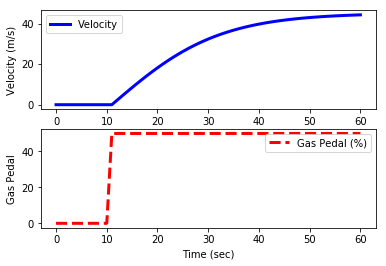

In [7]:
# plot results
plt.figure()
plt.subplot(2,1,1)
plt.plot(ts,vs,'b-',linewidth=3)
plt.ylabel('Velocity (m/s)')
plt.legend(['Velocity'],loc=2)
plt.subplot(2,1,2)
plt.plot(ts,step,'r--',linewidth=3)
plt.ylabel('Gas Pedal')    
plt.legend(['Gas Pedal (%)'])
plt.xlabel('Time (sec)')
plt.show()